# **Importing Libraries**

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

# **Reading and Exploring Data**

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [20]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [21]:
df.duplicated().sum()

np.int64(0)

# **EDA Phase** 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

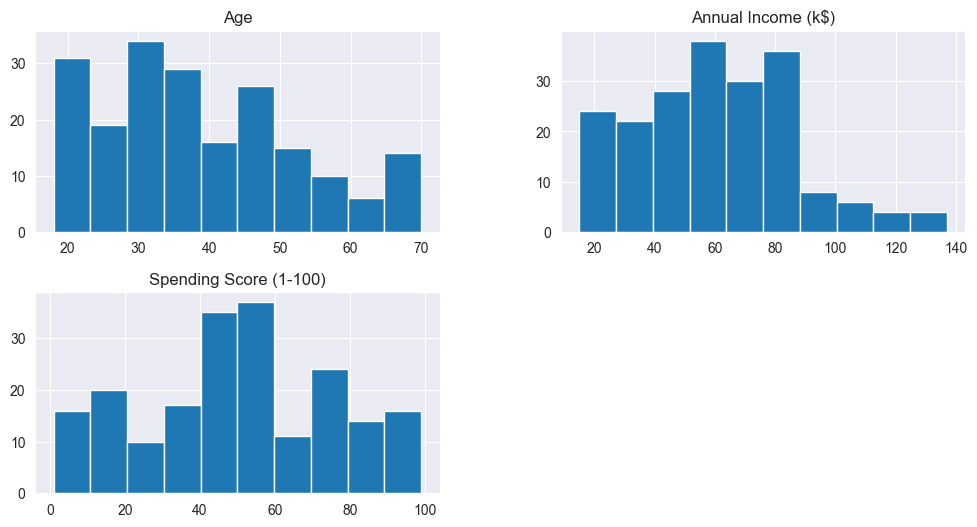

In [24]:
df1=df.drop(['CustomerID','Gender'],axis=1)
df1.hist(figsize=(12,6))

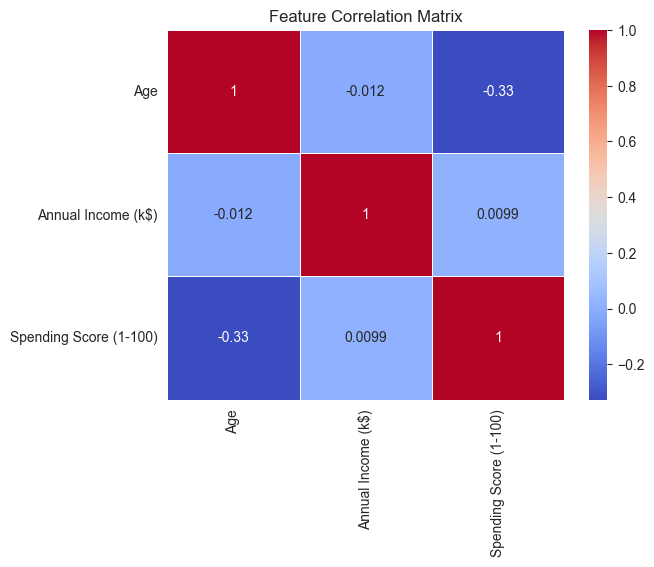

In [25]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# **Data Preparation for training**

In [26]:
scaler=StandardScaler()
df1_scaled=scaler.fit_transform(df1)

# **Model Training and Evaluation**

In [27]:
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df1_scaled)
    inertia.append(model.inertia_)


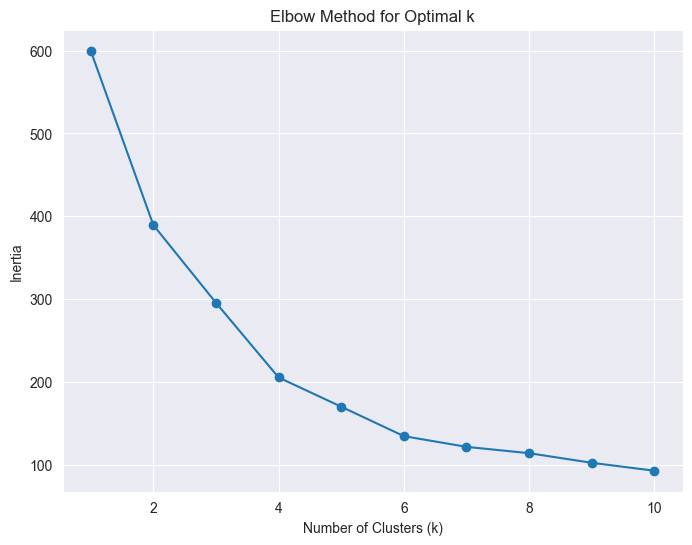

In [28]:
plt.figure(figsize=(8,6))
plt.plot(K, inertia, '-o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [29]:
optimal_k = 5
k_means = KMeans(n_clusters=optimal_k, random_state=42)
k_means.fit(df1_scaled)
labels = k_means.labels_

# Add labels to dataset
df1['Cluster'] = labels


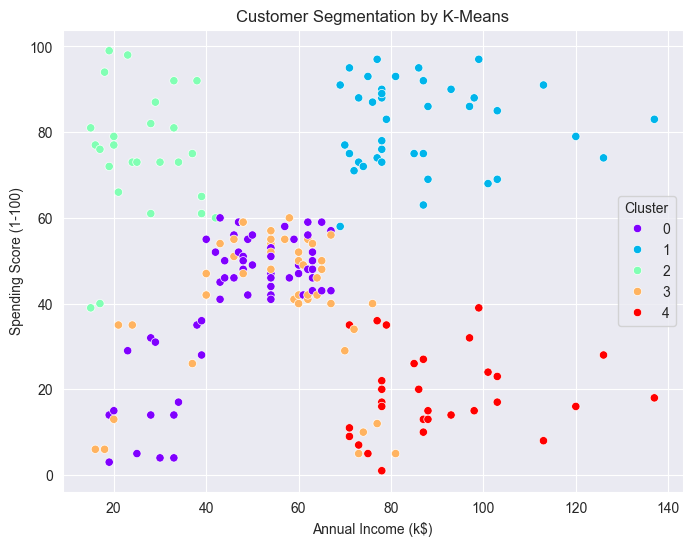

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df1['Cluster'],
    palette='rainbow'
)
plt.title('Customer Segmentation by K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
